# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [212]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [213]:
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=London'

In [214]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = rq.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    # time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | igarka


Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | gizo
Processing Record 9 of Set 1 | luninyets
Processing Record 10 of Set 1 | wynne
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 1 | udachny
Processing Record 24 of Set 1 | blackmans bay
Processing Record 25 of Set 1 | knjazevac
Processi

In [215]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [216]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,32.58,68,42,13.31,TF,Fri Jul 19 15:22:45 2024
1,ushuaia,-54.8000,-68.3000,46.02,81,40,4.61,AR,Fri Jul 19 15:22:45 2024
2,igarka,67.4667,86.5833,45.19,67,4,14.58,RU,Fri Jul 19 15:22:45 2024
3,waitangi,-43.9535,-176.5597,52.83,95,100,28.83,NZ,Fri Jul 19 15:22:45 2024
4,ilulissat,69.2167,-51.1000,48.47,63,63,3.76,GL,Fri Jul 19 15:22:46 2024


In [217]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [218]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,32.58,68,42,13.31,TF,Fri Jul 19 15:22:45 2024
1,ushuaia,-54.8000,-68.3000,46.02,81,40,4.61,AR,Fri Jul 19 15:22:45 2024
2,igarka,67.4667,86.5833,45.19,67,4,14.58,RU,Fri Jul 19 15:22:45 2024
3,waitangi,-43.9535,-176.5597,52.83,95,100,28.83,NZ,Fri Jul 19 15:22:45 2024
4,ilulissat,69.2167,-51.1000,48.47,63,63,3.76,GL,Fri Jul 19 15:22:46 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [219]:
time.strftime('%Y-%m-%d')

'2024-07-19'

In [220]:
# # Build scatter plot for latitude vs. temperature
# # Incorporate the other graph properties

# city_data_df.plot.scatter(
#     'Lat',
#     'Max Temp', 
#     grid=True, 
#     edgecolor='black',
#     xlabel = 'Latitude',
#     ylabel = 'Max Temp (F)',
#     figsize = [8,6],
#     title = f'City Max Latitude vs Temperature ({time.strftime('%Y-%m-%d')})',
# )

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

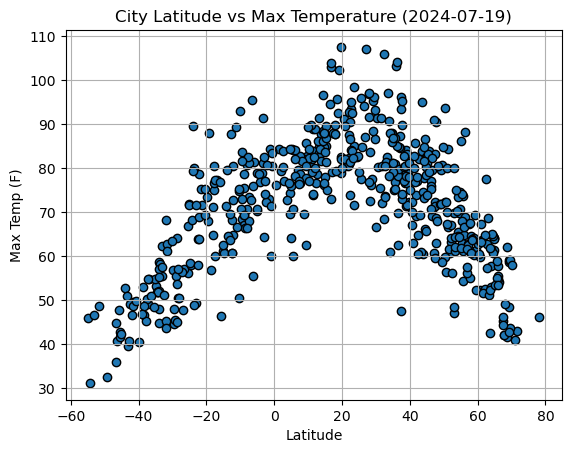

In [221]:
x = city_data_df.Lat
y = city_data_df['Max Temp']

# Build scatter plot for latitude vs. temperature
plt.scatter(x,y, edgecolors='black')

# Incorporate the other graph properties
plt.grid()

plt.title(f'City Latitude vs Max Temperature ({time.strftime('%Y-%m-%d')})')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

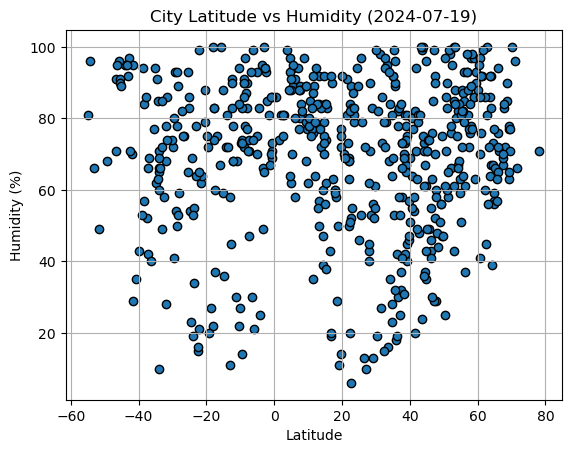

In [222]:
x = city_data_df.Lat
y = city_data_df['Humidity']

# Build scatter plot for latitude vs. temperature
plt.scatter(x,y, edgecolors='black')

# Incorporate the other graph properties
plt.grid()

plt.title(f'City Latitude vs Humidity ({time.strftime('%Y-%m-%d')})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

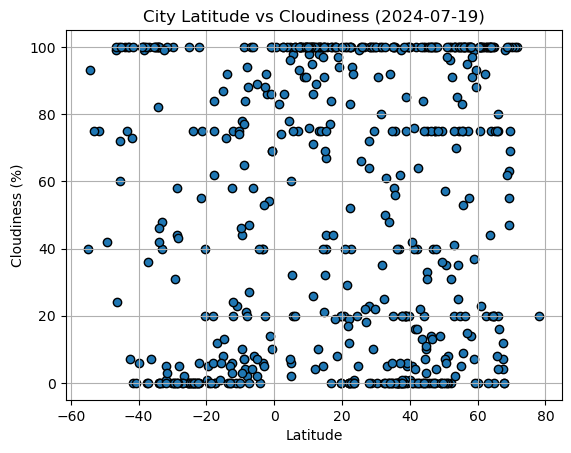

In [223]:
x = city_data_df.Lat
y = city_data_df['Cloudiness']

# Build scatter plot for latitude vs. temperature
plt.scatter(x,y, edgecolors='black')

# Incorporate the other graph properties
plt.grid()

plt.title(f'City Latitude vs Cloudiness ({time.strftime('%Y-%m-%d')})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

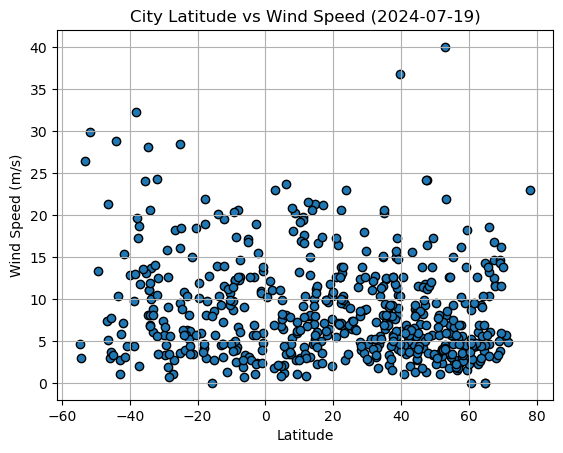

In [224]:
x = city_data_df.Lat
y = city_data_df['Wind Speed']

# Build scatter plot for latitude vs. temperature
plt.scatter(x,y, edgecolors='black')

# Incorporate the other graph properties
plt.grid()

plt.title(f'City Latitude vs Wind Speed ({time.strftime('%Y-%m-%d')})')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [225]:
x.min()

-54.8

In [226]:
lr

LinregressResult(slope=-0.023450370803817427, intercept=9.141433832939903, rvalue=-0.1208785077431281, pvalue=0.0031964015473015662, stderr=0.007921557949750083, intercept_stderr=0.2957488995271549)

In [227]:
# Define a function to create Linear Regression plots
def chart(x,y,title,coord):
    lr = linregress(x,y)
    dependent_var = x*lr.slope + lr.intercept

    print(f'The r^2-value is: {lr.rvalue}')

    plt.annotate(f'y = {lr.slope:.2f}x + {lr.intercept:.2f}', coord, c='r', fontsize=14)

    plt.plot(x,dependent_var, 'r', linewidth=4)
    plt.scatter(x,y, edgecolors='black')
    plt.title(f'Latitude vs {title} ({time.strftime('%Y-%m-%d')})')
    plt.ylabel([title])
    plt.xlabel('Latitude')
    plt.grid();

In [228]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,igarka,67.4667,86.5833,45.19,67,4,14.58,RU,Fri Jul 19 15:22:45 2024
4,ilulissat,69.2167,-51.1000,48.47,63,63,3.76,GL,Fri Jul 19 15:22:46 2024
7,luninyets,52.2472,26.8047,63.28,76,0,4.03,BY,Fri Jul 19 15:22:47 2024
8,wynne,35.2245,-90.7868,80.40,53,58,9.42,US,Fri Jul 19 15:22:47 2024
10,college,64.8569,-147.8028,64.09,59,20,0.00,US,Fri Jul 19 15:22:47 2024


In [229]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,32.58,68,42,13.31,TF,Fri Jul 19 15:22:45 2024
1,ushuaia,-54.8000,-68.3000,46.02,81,40,4.61,AR,Fri Jul 19 15:22:45 2024
3,waitangi,-43.9535,-176.5597,52.83,95,100,28.83,NZ,Fri Jul 19 15:22:45 2024
5,margaret river,-33.9500,115.0667,58.75,65,100,20.56,AU,Fri Jul 19 15:22:46 2024
6,gizo,-8.1030,156.8419,80.67,83,94,20.56,SB,Fri Jul 19 15:22:46 2024


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.657355026151298


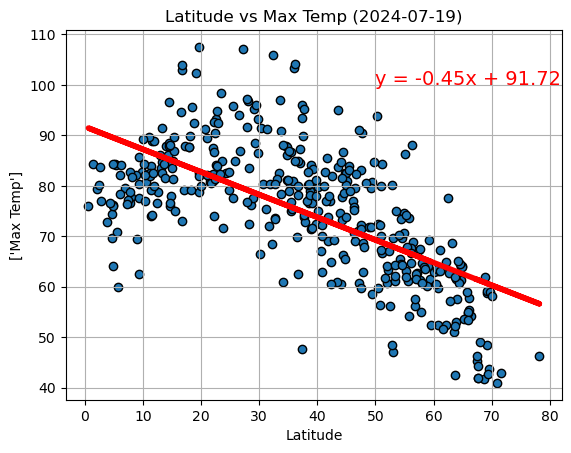

In [230]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Max Temp']
title = 'Max Temp'
coord = [50,100]

chart(x,y,title,coord)

The r^2-value is: 0.8022305196525861


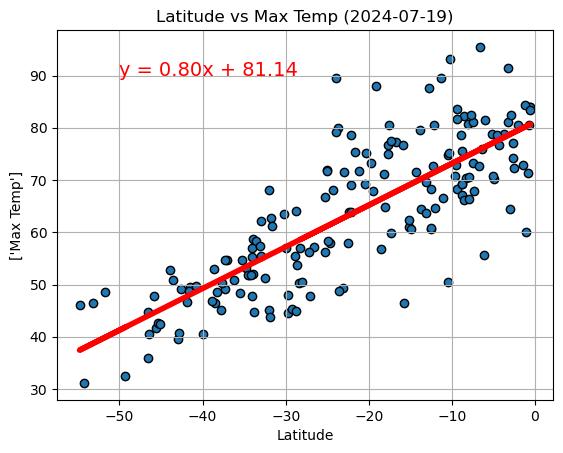

In [231]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Max Temp']
title = 'Max Temp'
coord = [-50,90]

chart(x,y,title,coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.025786584744599675


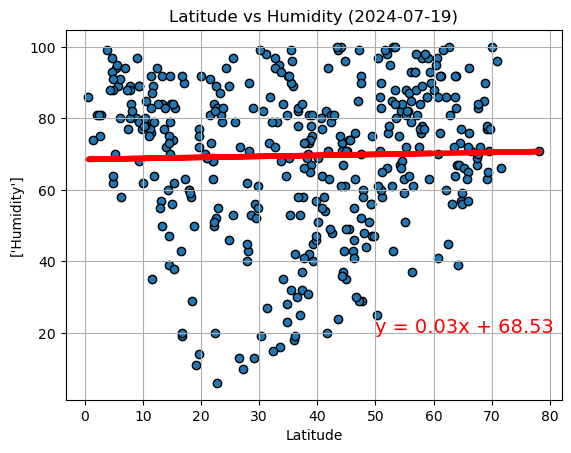

In [232]:
# Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Humidity']
title = 'Humidity'
coord = [50,20]

chart(x,y,title,coord)

The r^2-value is: -0.0028129467423750765


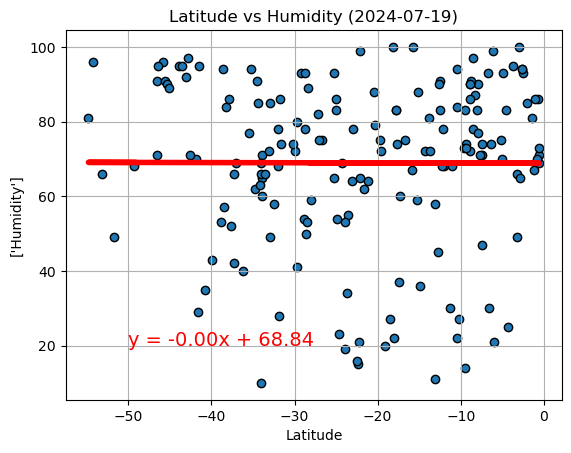

In [233]:
# Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Humidity']
title = 'Humidity'
coord = [-50,20]

chart(x,y,title,coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.10454071804196871


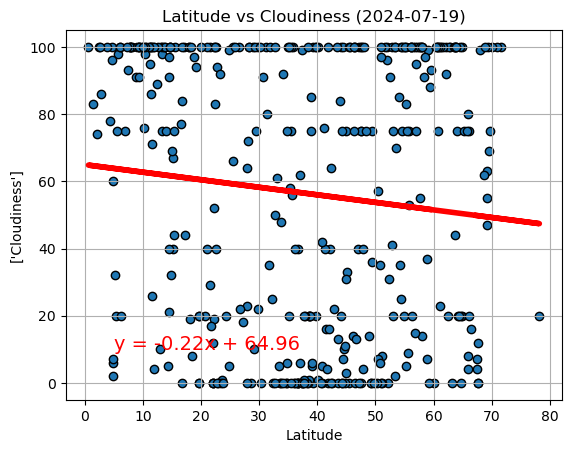

In [234]:
# Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Cloudiness']
title = 'Cloudiness'
coord = [5,10]

chart(x,y,title,coord)

The r^2-value is: -0.17302542814458133


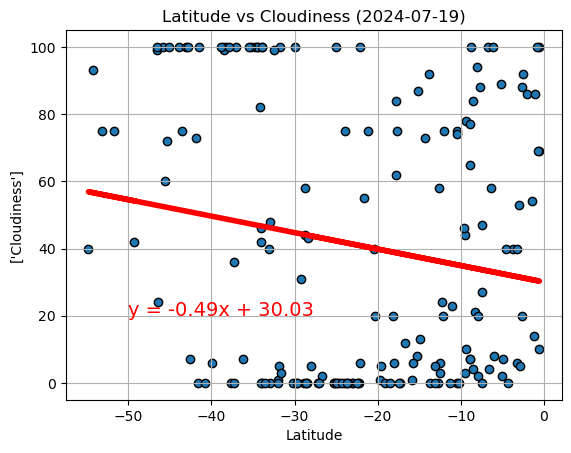

In [235]:
# Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Cloudiness']
title = 'Cloudiness'
coord = [-50,20]

chart(x,y,title,coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.11499223734733909


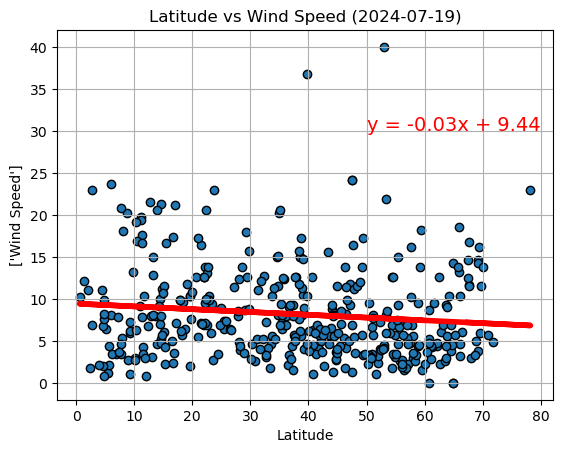

In [236]:
# Northern Hemisphere
x=northern_hemi_df.Lat
y=northern_hemi_df['Wind Speed']
title = 'Wind Speed'
coord = [50,30]

chart(x,y,title,coord)

The r^2-value is: -0.15283714812184984


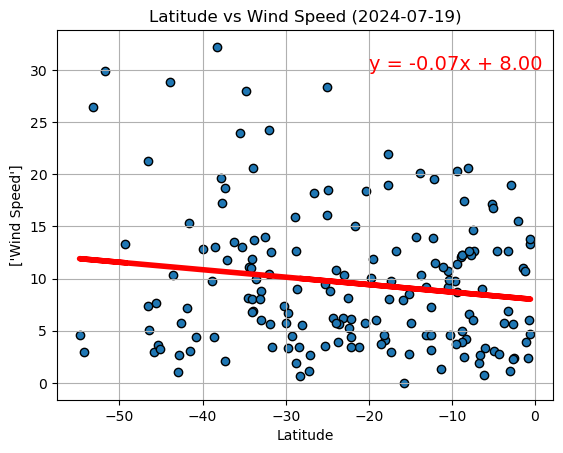

In [237]:
# Southern Hemisphere
x=southern_hemi_df.Lat
y=southern_hemi_df['Wind Speed']
title = 'Wind Speed'
coord = [-20,30]

chart(x,y,title,coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [238]:
# Northern Hemisphere: Temperature decreases as latitude increases

# Southern Hemisphere: Temperature increases as latitude increases

# Northern Hemisphere: No significant change to humidity as latitude increases

# Southern Hemisphere: Humidity decreases as latitude increases

# Northern Hemisphere: Cloudiness decreases as latutitude increases

# Southern Hemisphere: Cloudiness slightly decreasese as latitude increases

# Northern Hemisphere: Wind Speed slightly decreasese as latitude increases

# Southern Hemisphere: Wind Speed decreasese as latitude increases